## Quantum Encoding for QG Dataset ##
Using angular encoding

TODO: 
- Fix absolute path


(8, 8, 4)


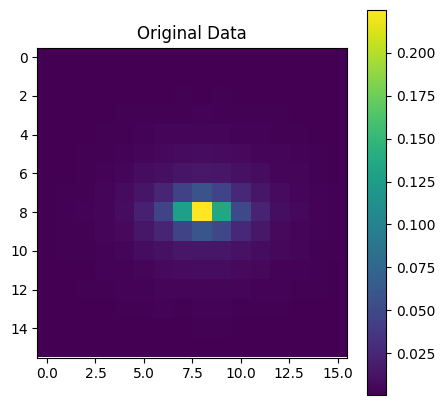

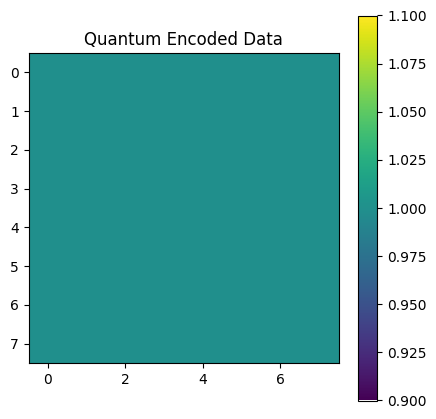

In [72]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import pennylane as qml
from pennylane.templates import RandomLayers

# filename="C:/Users/realc/OneDrive/Documents/GSOC/data/small_QG_train_normalized_5"
filename = "C:/Users/realc/OneDrive/Documents/GSOC/data/QG_train_normalized_16_xl"

file = h5py.File(filename,"r")

# plt.imshow(np.mean(file['X'], axis=0), norm=matplotlib.colors.LogNorm())
# plt.colorbar()

data_X = np.array(file['X'])

num_qubits = 4
dev = qml.device("default.qubit", wires=num_qubits)
# rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    for j in range(4):
        qml.RX(np.pi * phi[j], wires=j)
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]


def encode(data):
    out = np.zeros((8, 8, 4))

    for i in range(0, 16, 2):
        for j in range(0, 16, 2):
            q_results = circuit(
                [
                    data[i, j, 0],
                    data[i, j+1, 0],
                    data[i+1, j, 0],
                    data[i+1, j+1, 0]
                ]
            )
            for c in range(4):
                out[i//2, j//2, c] = q_results[c]
    return out

def visualize_data(original_data, encoded_data, sample_index=0):
    encoded_sample = encoded_data
    original_mean = np.mean(original_data, axis=0)

    plt.figure(figsize=(5, 5))
    # plt.imshow(original_data[sample_index], cmap='viridis')
    plt.imshow(original_mean, cmap='viridis')
    plt.title("Original Data")
    plt.colorbar()
    plt.show()

    encoded_image = np.mean(encoded_sample, axis=2)

    plt.figure(figsize=(5, 5))
    plt.imshow(encoded_image, cmap='viridis')
    plt.title("Quantum Encoded Data")
    plt.colorbar()
    plt.show()

encoded_data = encode(data_X)
print(encoded_data.shape)

visualize_data(data_X, encoded_data, sample_index=0)